In [2]:
import cv2
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

pd.set_option('display.max_rows', None)


### Task A. Get familiar with First Impressions dataset
First Impressions dataset is compound of multimodal samples that combine audio, text, and image sources.

In [3]:
path = '/ghome/group04/MCV-C5-G4/First_Impressions_v3_multimodal/'
train_path = path+'train/'
test_path = path+'test/'
val_path = path+'valid/'


In [4]:
train_csv = pd.read_csv('/ghome/group04/MCV-C5-G4/First_Impressions_v3_multimodal/train_set_age_labels.csv')
test_csv = pd.read_csv('/ghome/group04/MCV-C5-G4/First_Impressions_v3_multimodal/test_set_age_labels.csv')
val_csv = pd.read_csv('/ghome/group04/MCV-C5-G4/First_Impressions_v3_multimodal/valid_set_age_labels.csv')

print(len(train_csv), len(val_csv), len(test_csv))
all_records = pd.concat([train_csv, pd.concat([val_csv, test_csv])]).reset_index(drop=True)
print(len(all_records))


6006 2019 1975
10000


##### Cleaning
Homogenizing data based on UserID. When a user has multiple samples with data inconsistencies (showing different age group, gender or ethnicity), we homogenize by       following criteria:
- Age: average bounded to lower integer
- Ethnicity and Gender: voting, random in case of draw

In [5]:

grouped = all_records.groupby('UserID')

for id, subdf in grouped:

    #check if inconsistency
    if len(subdf) > 1:

        if (subdf['AgeGroup'].nunique()>1):
            avg_age = int(sum(subdf['AgeGroup'])/len(subdf['AgeGroup']))
        else:
            avg_age = subdf['AgeGroup'].iloc[0]

        if (subdf['Gender'].nunique()>1):
            maj_gender = subdf['Gender'].value_counts().index[0]
        else:
            maj_gender = subdf['Gender'].iloc[0]

        if (subdf['Ethnicity'].nunique()>1):
            maj_ethnicity = subdf['Ethnicity'].value_counts().index[0]
        else:
            maj_ethnicity = subdf['Ethnicity'].iloc[0]

    
        all_records.loc[all_records['UserID'] == id, 'AgeGroup'] = avg_age
        all_records.loc[all_records['UserID'] == id, 'Gender'] = maj_gender
        all_records.loc[all_records['UserID'] == id, 'Ethnicity'] = maj_ethnicity

all_records['AgeGroup'] = all_records['AgeGroup'].astype(int)


In [6]:
# save cleaned records into train, valid, and test files
all_records.loc[0:len(train_csv)-1].to_csv(path+'cleaned_train_set_age_labels.csv', index=False)
all_records.loc[len(train_csv):len(train_csv)+len(val_csv)-1].to_csv(path+'cleaned_valid_set_age_labels.csv', index=False)
all_records.loc[len(train_csv)+len(val_csv):10000].to_csv(path+'cleaned_test_set_age_labels.csv', index=False)


In [7]:
# For unique UserID analysis
all_records = test_csv
unique_records = all_records.drop(['VideoName'], axis=True)
unique_records.drop_duplicates(inplace=True)


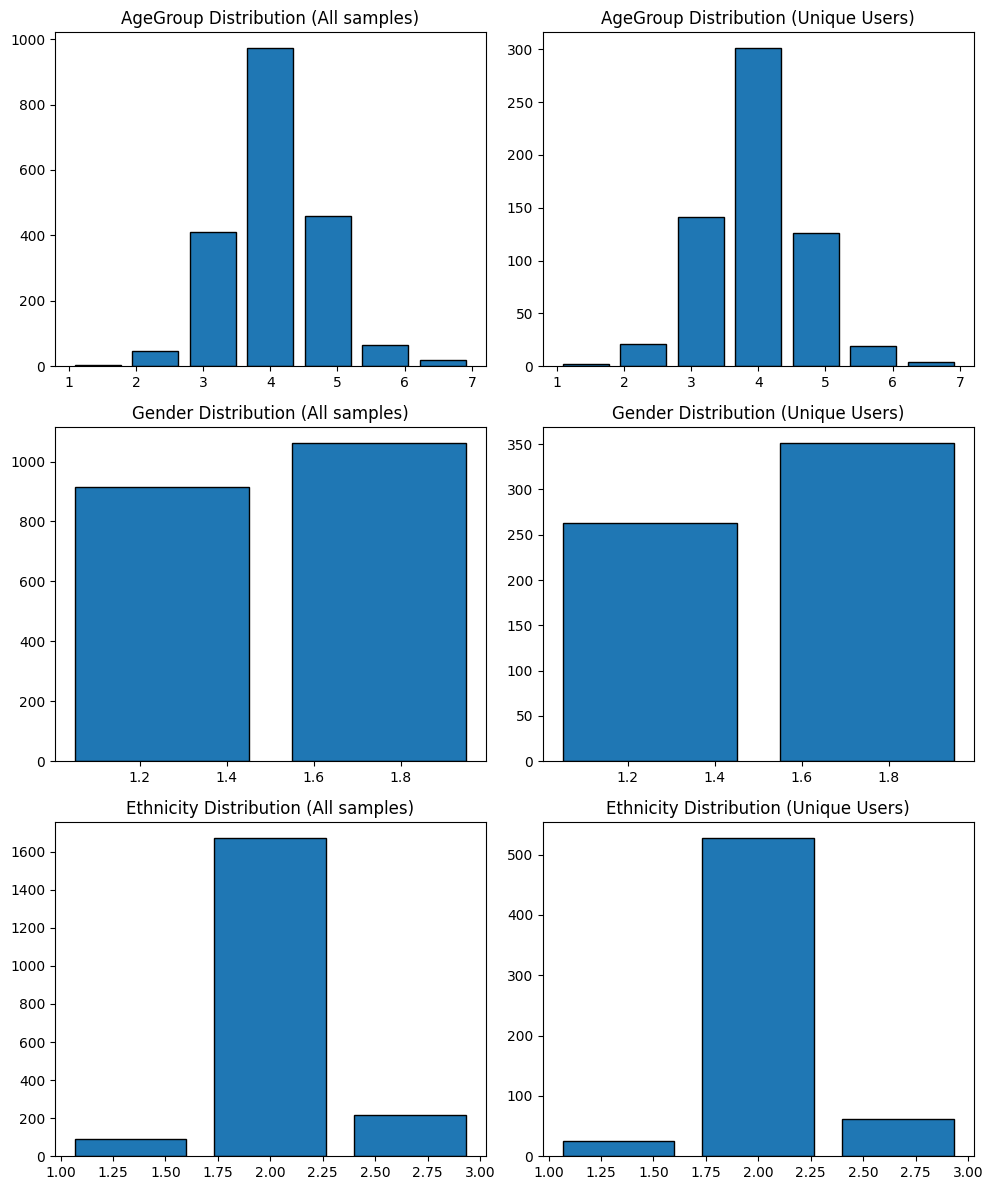

In [8]:
# Basic histograms

atributes = ['AgeGroup', 'Gender', 'Ethnicity']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

for i in range (0, len(atributes)):
    axes[i, 0].hist(all_records[atributes[i]], bins=all_records[atributes[i]].nunique(), edgecolor='black', rwidth=0.8)
    #axes[i, 0].plot(*np.histogram(train_csv[atributes[i]], bins=train_csv[atributes[i]].nunique()), color='skyblue')
    axes[i, 0].set_title(f'{atributes[i]} Distribution (All samples)')

    axes[i, 1].hist(unique_records[atributes[i]], bins=unique_records[atributes[i]].nunique(), edgecolor='black', rwidth=0.8)
    axes[i, 1].set_title(f'{atributes[i]} Distribution (Unique Users)')

plt.tight_layout()


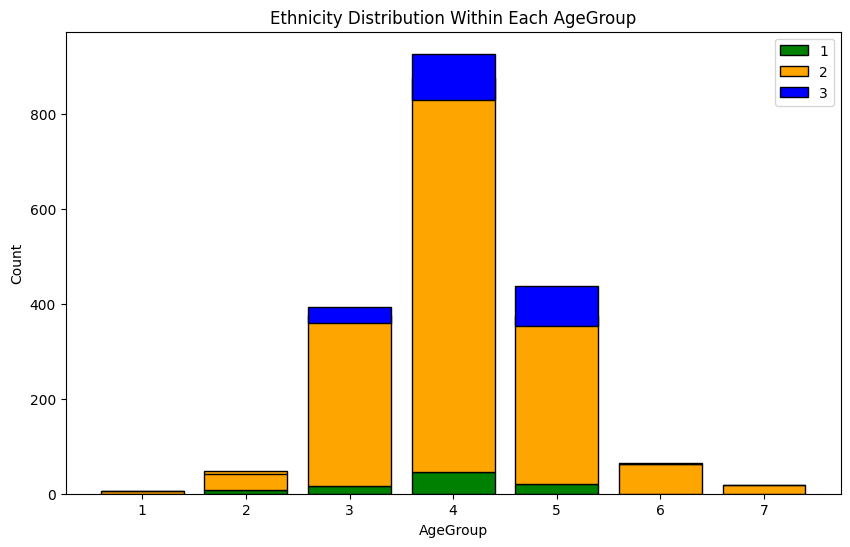

In [9]:
# Nested Histograms - Example for AgeGroup and Gender, and AgeGroup and Ethnicity

age_groups = all_records['AgeGroup']
genders = all_records['Ethnicity']

# Get unique age groups
unique_age_groups = all_records['AgeGroup'].unique()

# Create a grid of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each unique age group
for age_group in unique_age_groups:
    # Select gender data for the current age group
    gender_data = genders[age_groups == age_group]
    
    # Count the occurrences of each gender category
    a1_count = np.sum(gender_data == 1)
    a2_count = np.sum(gender_data == 2)
    a3_count = np.sum(gender_data == 3)
    
    # Plot stacked bar chart for gender distribution within the age group subplot
    ax.bar(age_group, a1_count, color='green', label='1' if age_group == unique_age_groups[0] else None, edgecolor='black')
    ax.bar(age_group, a2_count, bottom=a1_count, color='orange', label='2' if age_group == unique_age_groups[0] else None, edgecolor='black')
    ax.bar(age_group, a3_count, bottom=a2_count, color='blue', label='3' if age_group == unique_age_groups[0] else None, edgecolor='black')

# Set labels and title for the plot
ax.set_xlabel('AgeGroup')
ax.set_ylabel('Count')
ax.set_title('Ethnicity Distribution Within Each AgeGroup')

# Add legend outside the loop
ax.legend()

# Show plot
plt.show()


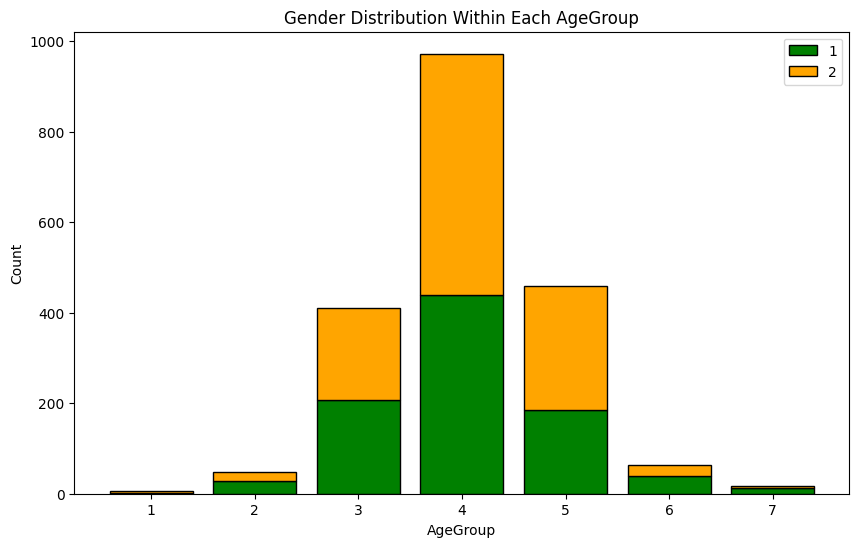

In [11]:
age_groups = all_records['AgeGroup']
genders = all_records['Gender']

# Get unique age groups
unique_age_groups = all_records['AgeGroup'].unique()

# Create a grid of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each unique age group
for age_group in unique_age_groups:
    # Select gender data for the current age group
    gender_data = genders[age_groups == age_group]
    
    # Count the occurrences of each gender category
    male_count = np.sum(gender_data == 1)
    female_count = np.sum(gender_data == 2)
    
    # Plot stacked bar chart for gender distribution within the age group subplot
    ax.bar(age_group, male_count, color='green', label='1' if age_group == unique_age_groups[0] else None, edgecolor='black')
    ax.bar(age_group, female_count, bottom=male_count, color='orange', label='2' if age_group == unique_age_groups[0] else None, edgecolor='black')

# Set labels and title for the plot
ax.set_xlabel('AgeGroup')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution Within Each AgeGroup')

# Add legend outside the loop
ax.legend()

# Show plot
plt.show()